In [46]:
from astropy.io import fits
from astropy.table import Table, Column, hstack, vstack
import pdb, glob
import numpy as np
import rafias_lib as rl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## General

In [47]:
test = ['clr1', 'clr2', 'clr3', 'clr4', 'clr5', 'clr6', 'full1', 'full2', 'full3', 'full4', 'full5', 'fullQ', 
        'sub320', 'sub640']

## Clearsubs

In [48]:
a1_files_clr = []
for n in ['1', '2', '3', '4', '5', '6']:
    a1_files_clr.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB'+n+'*_481_SE_2016-*/*.slp.fits')))

In [49]:
b4_files_clr = []
for n in ['1', '2', '3', '4', '5', '6']:
    b4_files_clr.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB'+n+'*_489_SE_2016-*/*.slp.fits')))

In [50]:
a1_centers_clr = []
for ds in a1_files_clr:
    a1_centers_clr.append(rl.gen_center_g2d(164,161,5,3500,2,2,0,ds))

In [51]:
b4_centers_clr = []
for ds in b4_files_clr:
    b4_centers_clr.append(rl.gen_center_g2d(160,155,5,4500,2,2,0,ds))

In [52]:
a1_data_clr = []
for x in range(1,7):
    globals()['a1_data_clr%s' % x] = rl.time_series(a1_centers_clr[x-1][1], a1_centers_clr[x-1][2],
                                                    a1_files_clr[x-1], 3, 9, 10)
    a1_data_clr.append(globals()['a1_data_clr%s' % x])

In [53]:
b4_data_clr = []
for x in range(1,7):
    globals()['b4_data_clr%s' % x] = rl.time_series(b4_centers_clr[x-1][1], b4_centers_clr[x-1][2], 
                                                    b4_files_clr[x-1], 3, 9, 10)
    b4_data_clr.append(globals()['b4_data_clr%s' % x])

In [54]:
av_data_clr = []
for x in range(1,7):
    globals()['av_data_clr%s' % x] = (a1_data_clr[x-1]['res_flux']+b4_data_clr[x-1]['res_flux'])/2 
    av_data_clr.append(globals()['av_data_clr%s' % x])

In [55]:
stdev_clr = Table(names = ('Test Number', 'NGROUP', 'Stdev'))
for i, files in enumerate(a1_files_clr):
    st_dev = np.std(av_data_clr[i][3:]/np.median(av_data_clr[i][3:]))
    header = rl.test_image(files[5])[2]
    ngroup = header['NGROUP']
    stdev_clr.add_row([i+1, ngroup, st_dev*1e6])
stdev_clr

Test Number,NGROUP,Stdev
float64,float64,float64
1.0,3.0,2513.05772647
2.0,3.0,2388.57613272
3.0,3.0,2374.41464553
4.0,3.0,2680.91156766
5.0,3.0,2220.09672255
6.0,3.0,2331.85451648


## Full

In [56]:
a1_files_full = []
for n in ['1', '2', '3', '4', '5', 'Q']:
    a1_files_full.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              'NRCN821WLP8FULL'+n+'-*_1_481_SE_*/*.red.fits')))

In [57]:
b4_files_full = []
for n in ['1', '2', '3', '4', '5', 'Q']:
    b4_files_full.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              'NRCN821WLP8FULL'+n+'-*_1_489_SE_*/*.red.fits')))

In [58]:
a1_centers_full = []
for ds in a1_files_full:
    a1_centers_full.append(rl.gen_center_g2d(1405,1036,5,400,4,4,0,ds, red = True))

In [59]:
b4_centers_full = []
for ds in b4_files_full:
    b4_centers_full.append(rl.gen_center_g2d(828,821,5,600,4,4,0,ds, red = True))

In [60]:
a1_data_full = []
for x in range(1,7):
    globals()['a1_data_full%s' % x] = rl.time_series(a1_centers_full[x-1][1], a1_centers_full[x-1][2], 
                                                     a1_files_full[x-1], 70, 72, 80, red = True)
    a1_data_full.append(globals()['a1_data_full%s' % x])

In [61]:
b4_data_full = []
for x in range(1,7):
    globals()['b4_data_full%s' % x] = rl.time_series(b4_centers_full[x-1][1], b4_centers_full[x-1][2], 
                                                     b4_files_full[x-1], 70, 72, 80, red = True)
    b4_data_full.append(globals()['b4_data_full%s' % x])

In [62]:
av_data_full = []
for x in range(1,7):
    globals()['av_data_full%s' % x] = (a1_data_full[x-1]['res_flux']+b4_data_full[x-1]['res_flux'])/2 
    av_data_full.append(globals()['av_data_full%s' % x])

In [63]:
stdev_full = Table(names = ('Test Number', 'NGROUP', 'Stdev'))
for i, files in enumerate(a1_files_full):
    st_dev = np.std(av_data_full[i-1][3:]/np.median(av_data_full[i-1][3:]))
    header = rl.test_image(files[5])[2]
    ngroup = header['NGROUP']
    stdev_full.add_row([i+1, ngroup, st_dev*1e6])
stdev_full

Test Number,NGROUP,Stdev
float64,float64,float64
1.0,2.0,1742.75256569
2.0,2.0,1519.44586346
3.0,2.0,1709.69691753
4.0,2.0,1961.10887829
5.0,2.0,1355.9341994
6.0,2.0,1230.2254514


## Sub

In [64]:
a1_files_sub = []
for n in ['-', '640-']:
    a1_files_sub.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB'+n+'60*_1_481_SE_*/*.slp.fits')))

In [65]:
b4_files_sub = []
for n in ['-','640-']:
    b4_files_sub.append(np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              '/NRCN821WLP8SUB'+n+'60*_1_489_SE_*/*.slp.fits')))

In [66]:
a1_centers_sub = []
for i, ds in enumerate(a1_files_sub):
    if i == 0:
        a1_centers_sub.append(rl.gen_center_g2d(166,160,5,400,2,2,0,ds))
    else:
        a1_centers_sub.append(rl.gen_center_g2d(326,320,5,400,2,2,0,ds))

In [67]:
b4_centers_sub = []
for i, ds in enumerate(b4_files_sub):
    if i == 0:
        b4_centers_sub.append(rl.gen_center_g2d(162,156,5,500,2,2,0,ds))
    else:
        b4_centers_sub.append(rl.gen_center_g2d(319,316,5,500,2,2,0,ds))

In [68]:
a1_data_sub = []
for x in range(1,3):
    globals()['a1_data_sub%s' % x] = rl.time_series(a1_centers_sub[x-1][1], a1_centers_sub[x-1][2], 
                                                     a1_files_sub[x-1], 70, 72, 80)
    a1_data_sub.append(globals()['a1_data_sub%s' % x])

In [69]:
b4_data_sub = []
for x in range(1,3):
    globals()['b4_data_sub%s' % x] = rl.time_series(b4_centers_sub[x-1][1], b4_centers_sub[x-1][2], 
                                                     b4_files_sub[x-1], 70, 72, 80)
    b4_data_sub.append(globals()['b4_data_sub%s' % x])

In [70]:
av_data_sub = []
for x in range(1,3):
    globals()['av_data_sub%s' % x] = (a1_data_sub[x-1]['res_flux']+b4_data_sub[x-1]['res_flux'][:306])/2 
    av_data_sub.append(globals()['av_data_sub%s' % x])

In [71]:
stdev_sub = Table(names = ('Test Number', 'NGROUP', 'Stdev'))
for i, files in enumerate(a1_files_sub):
    st_dev = np.std(av_data_sub[i-1][3:]/np.median(av_data_sub[i-1][3:]))
    header = rl.test_image(files[5])[2]
    ngroup = header['NGROUP']
    stdev_sub.add_row([i+1, ngroup, st_dev*1e6])
stdev_sub

Test Number,NGROUP,Stdev
float64,float64,float64
1.0,20.0,2304.83527433
2.0,6.0,1588.42058749


## Results

In [72]:
all_test_std = vstack([stdev_clr, stdev_full, stdev_sub])
all_test_std

Test Number,NGROUP,Stdev
float64,float64,float64
1.0,3.0,2513.05772647
2.0,3.0,2388.57613272
3.0,3.0,2374.41464553
4.0,3.0,2680.91156766
5.0,3.0,2220.09672255
6.0,3.0,2331.85451648
1.0,2.0,1742.75256569
2.0,2.0,1519.44586346
3.0,2.0,1709.69691753


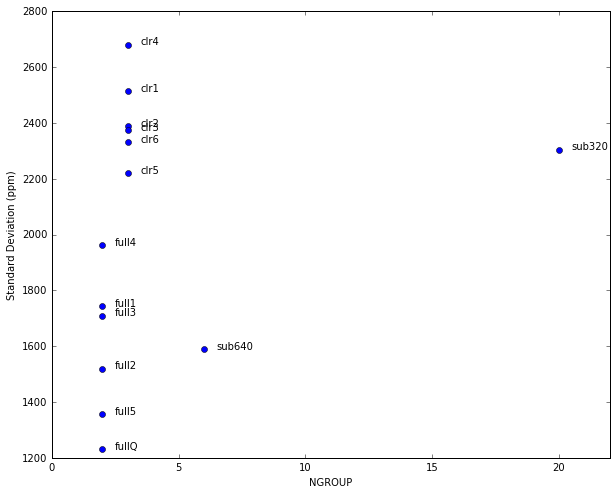

In [73]:
x = all_test_std['NGROUP']
y = all_test_std['Stdev']
plt.plot(x, y, 'o')
plt.xlim(0, 22)
plt.xlabel("NGROUP")
plt.ylabel("Standard Deviation (ppm)")
for i in range(0,14):
    plt.annotate(test[i], xy = (x[i], y[i]), xytext =(x[i] + 0.5, y[i]))